# Internet Service Provider Customer Churn

#  1. Problema de Negócio

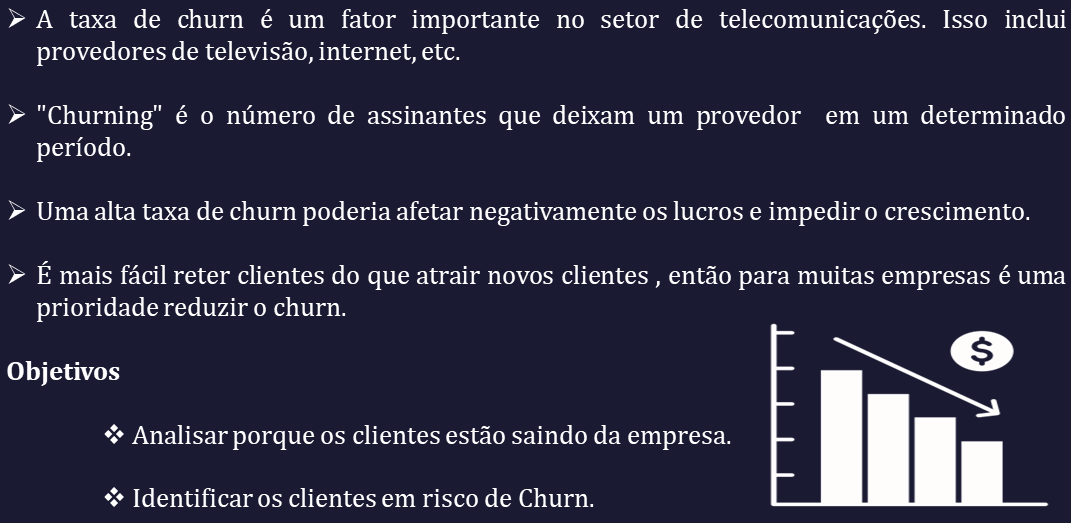

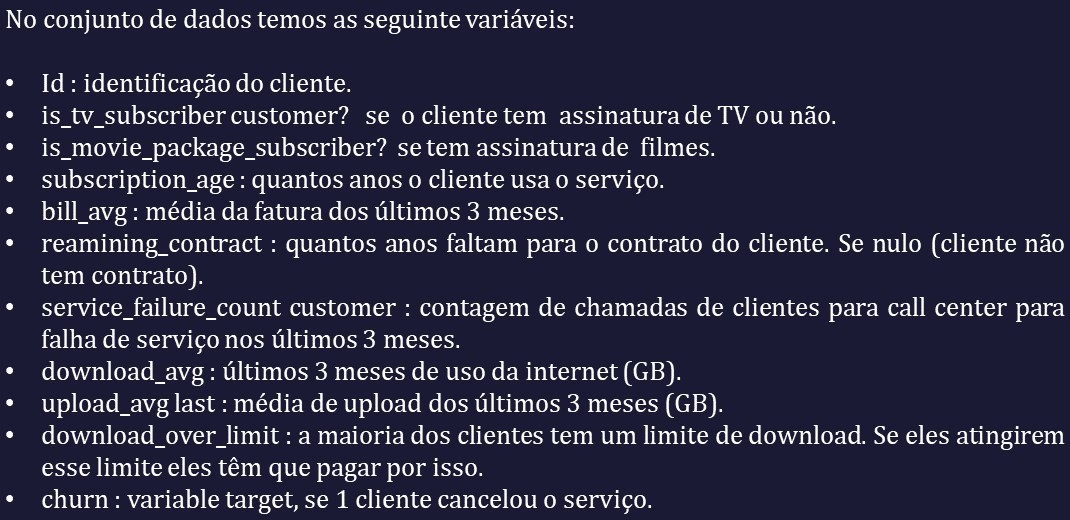

Data Source: https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn

## Importar bibliotecas e conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df = pd.read_csv("internet_service_churn.csv")

In [3]:
churn_df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
# Obter uma descrição dos dados
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


#### 11 variáveis e 72274 observações no dataset e a variável churn é a variável alvo. A variable download_avg e upload_avg tem missing values

In [5]:
# Quantos clientes deixaram a empresa
churn_df["churn"].value_counts()

1    40050
0    32224
Name: churn, dtype: int64

In [6]:
# Verificação de valores NaN (valores ausentes)
churn_df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [7]:
# Resumo dos atributos numéricos
churn_df.describe().transpose() # Em média o cliente usa o serviço 2 anos.
                                # 25% dos clientes pagam mais que 22 dólares.
                                # Em média falta 0.72 anos para que termine o contrato dos clientes.
                                # As chamadas ao call center por falha de serviço máxima é 19.
                                # Os clientes em média fizeram download de arquivos de 43.69(GB) e upload de 4.19(GB).
                                # 55.41 % dos clientes deixaram a empresa.

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


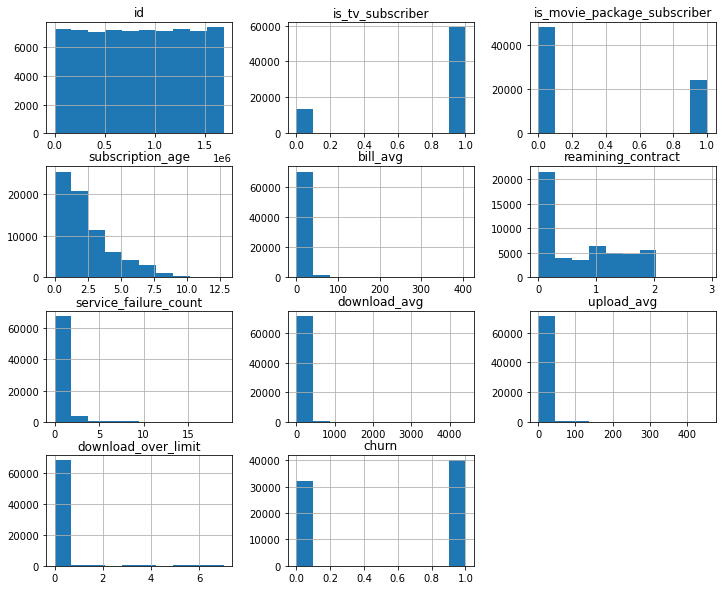

In [8]:
# Distribuição das variáveis
churn_df.hist(figsize=(12,10)) 
plt.show()

#### A maioria dos clientes possuem assinatura de TV porém a maioria não tem assinatura de filmes. A variável download_over_limit indica que a maioria dos clientes não passaram o limite descarga de arquivos.

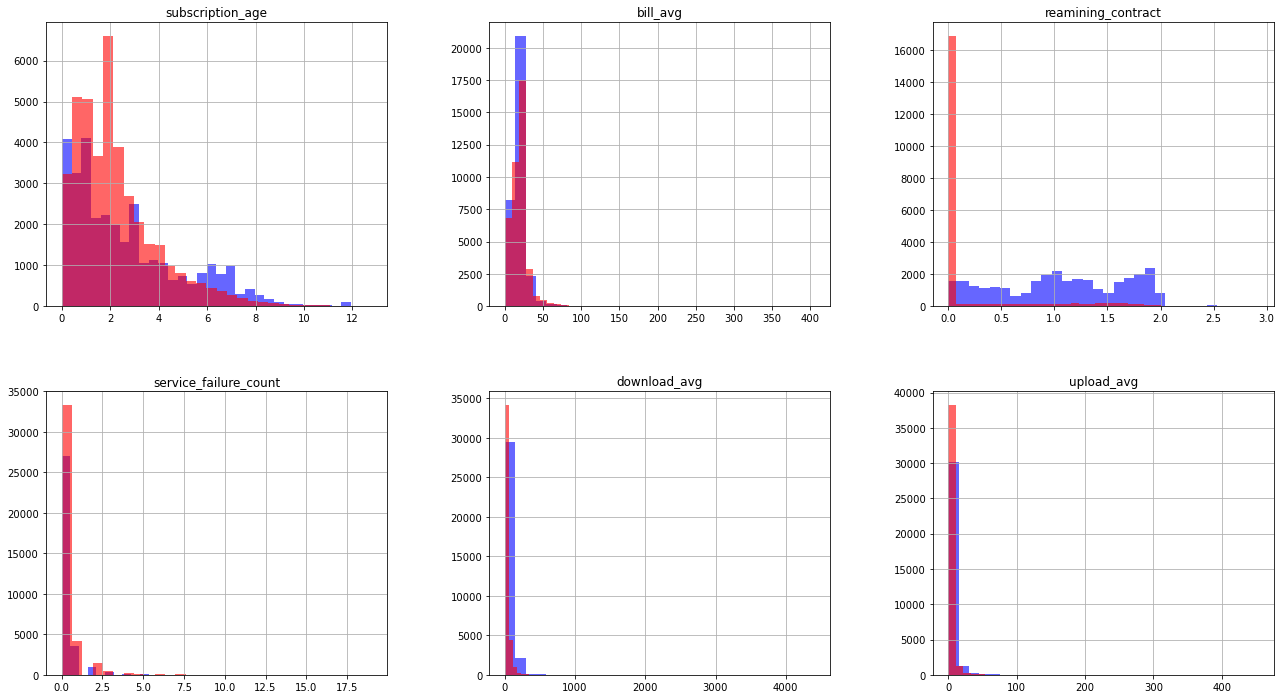

In [9]:
# Observar as distribuições de cada variável numérica em relação à variável churn.
churn_cont=['subscription_age','bill_avg','reamining_contract','service_failure_count','download_avg', 'upload_avg']
fig, ax = plt.subplots(2, 3, figsize=(22, 12));
churn_df[churn_df.churn == 0][churn_cont].hist( bins=30, color="blue", alpha=0.6, ax=ax);
churn_df[churn_df.churn == 1][churn_cont].hist( bins=30, color="red", alpha=0.6, ax=ax);

#### A evasão de clientes é menor quando o cliente usa o serviço mais que 5 anos. 

# 2. Análise Exploratória

## Qual o perfil de clientes que cancelaram o serviço?

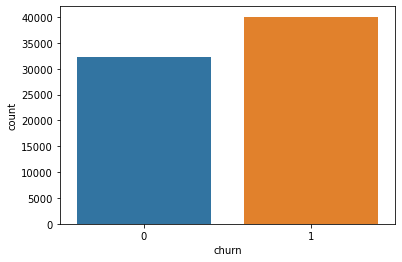

In [10]:
# Existe desbalanceamento em relação a variável churn.
sns.countplot(data=churn_df,x='churn');

### Variáveis categóricas em relação a variável churn.

In [11]:
# Variável is_tv_subscriber em relação a variável churn
churn_df['is_tv_subscriber']=churn_df['is_tv_subscriber'].replace([0,1],['0','1'])
churn_1 = churn_df.groupby ('is_tv_subscriber').churn.mean ().reset_index() 
churn_1

,is_tv_subscriber,churn
0,0,0.896195
1,1,0.476630


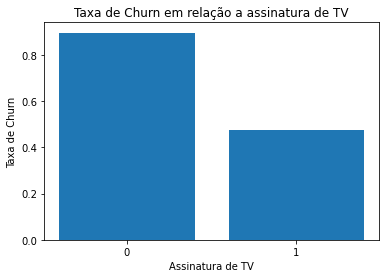

In [12]:
x =churn_1['is_tv_subscriber']
y= churn_1['churn']
plt.bar(x,y);
plt.title('Taxa de Churn em relação a assinatura de TV');
plt.xlabel('Assinatura de TV');
plt.ylabel('Taxa de Churn');

#### A porcentagem de Churn  é bastante elevada para clientes que não tem assinatura de TV, onde 89.62% dos clientes sairam da empresa.

In [13]:
# Variável is_movie_package_subscriber em relação a variável churn
churn_df['is_movie_package_subscriber']=churn_df['is_movie_package_subscriber'].replace([0,1],['0','1'])
churn_1 = churn_df.groupby ('is_movie_package_subscriber').churn.mean ().reset_index() 
churn_1

,is_movie_package_subscriber,churn
0,0,0.662418
1,1,0.338846


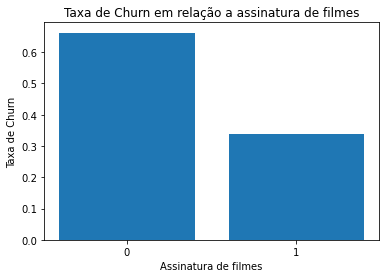

In [14]:
x =churn_1['is_movie_package_subscriber']
y= churn_1['churn']
plt.bar(x,y);
plt.title('Taxa de Churn em relação a assinatura de filmes');
plt.xlabel('Assinatura de filmes');
plt.ylabel('Taxa de Churn');

#### A taxa de churn é  o dobro para clientes que não tem assinatura de filmes.

In [15]:
# Variável download_over_limit em relação a variável churn
churn_df['download_over_limit']=churn_df['download_over_limit'].replace([0,1,2,3,4,5,6,7],['0','1','2','3','4','5','6','7'])
churn_1 = churn_df.groupby ('download_over_limit').churn.mean ().reset_index() 
churn_1

,download_over_limit,churn
0,0,0.535284
1,1,0.736292
2,2,0.812500
3,3,0.895582
4,4,0.929825
5,5,0.925408
6,6,0.962209
7,7,0.998016


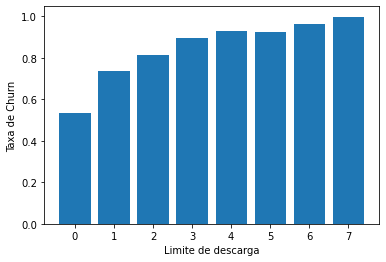

In [16]:
x =churn_1['download_over_limit']
y= churn_1['churn']
plt.bar(x,y);
plt.xlabel('Limite de descarga');
plt.ylabel('Taxa de Churn');

### Correlações entre variáveis numéricas 

In [17]:
# Variáveis numéricas
churn_num=churn_df[['subscription_age','bill_avg','reamining_contract','service_failure_count','download_avg', 'upload_avg']]
churn_num

,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg
0,11.95,25,0.14,0,8.4,2.3
1,8.22,0,NaN,0,0.0,0.0
2,8.91,16,0.00,0,13.7,0.9
3,6.87,21,NaN,1,0.0,0.0
4,6.39,0,NaN,0,0.0,0.0
...,...,...,...,...,...,...
72269,0.09,0,1.25,0,0.0,0.0
72270,0.06,1,1.63,0,0.8,0.0
72271,0.02,0,2.19,0,1.5,0.2
72272,0.01,0,0.72,0,0.0,0.0


In [18]:
corr_matrix = churn_num.corr()
corr_matrix

,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg
subscription_age,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277
bill_avg,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236
reamining_contract,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651
service_failure_count,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699
download_avg,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436
upload_avg,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000


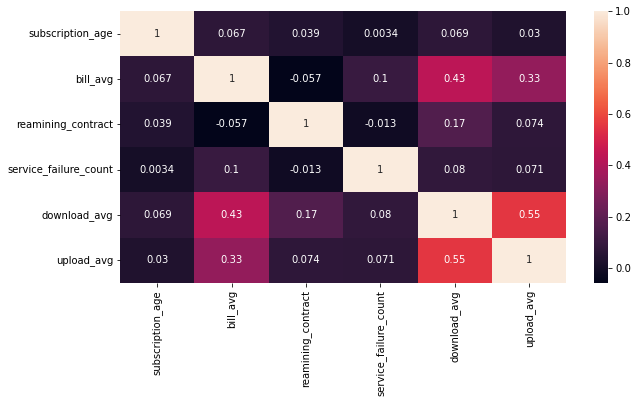

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_matrix, annot=True);

#### A maior correlação é entre as variáveis download_avg e upload_avg e temos uma correlação  de  0.55 entre elas, seguida entre as variáveis download_avg e bill_avg. Temos baixas correlações entre as outras variáveis.

### Variáveis contínuas em relação a variável churn.

churn
0    2.727828
1    2.226554
Name: subscription_age, dtype: float64

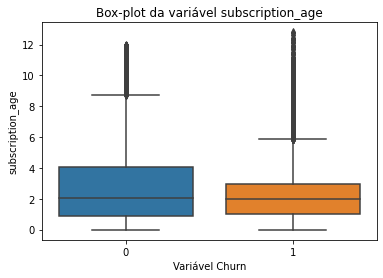

In [20]:
# subscription_age em relação ao Churn
sns.boxplot(x="churn", y="subscription_age", data=churn_df);
plt.title('Box-plot da variável subscription_age');
plt.xlabel('Variável Churn');
plt.ylabel('subscription_age');
churn_df.groupby(['churn'])['subscription_age'].mean()

#### Os clientes tentam deixar o serviço antes de 3 anos.

churn
0    19.252731
1    18.692859
Name: bill_avg, dtype: float64

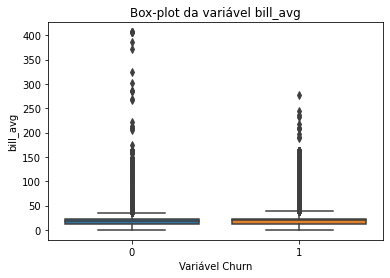

In [21]:
# bill_avg em relação ao Churn
sns.boxplot(x="churn", y="bill_avg", data=churn_df);
plt.title('Box-plot da variável bill_avg');
plt.xlabel('Variável Churn');
plt.ylabel('bill_avg');
churn_df.groupby(['churn'])['bill_avg'].mean()

#### A maioria dos valores fica entre 10 a 35 dólares para clientes que deram churn.

churn
0    1.072765
1    0.183152
Name: reamining_contract, dtype: float64

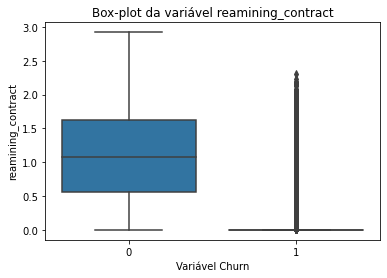

In [22]:
# reamining_contract em relação ao Churn
sns.boxplot(x="churn", y="reamining_contract", data=churn_df);
plt.title('Box-plot da variável reamining_contract');
plt.xlabel('Variável Churn');
plt.ylabel('reamining_contract');
churn_df.groupby(['churn'])['reamining_contract'].mean()

#### Os clientes que não têm contrato são os que cancelam o serviço

churn
0    0.254593
1    0.290037
Name: service_failure_count, dtype: float64

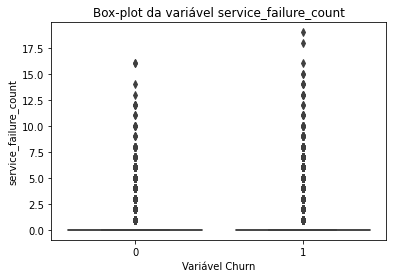

In [23]:
# service_failure_count em relação ao Churn
sns.boxplot(x="churn", y="service_failure_count", data=churn_df);
plt.title('Box-plot da variável service_failure_count');
plt.xlabel('Variável Churn');
plt.ylabel('service_failure_count');
churn_df.groupby(['churn'])['service_failure_count'].mean()

#### O service_failure_count parece não influenciar no cancelamento ou não do serviço.

churn
0    64.884728
1    26.838312
Name: download_avg, dtype: float64

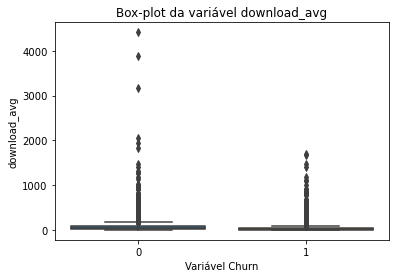

In [24]:
# download_avg em relação ao Churn
sns.boxplot(x="churn", y="download_avg", data=churn_df);
plt.title('Box-plot da variável download_avg');
plt.xlabel('Variável Churn');
plt.ylabel('download_avg');
churn_df.groupby(['churn'])['download_avg'].mean()

#### O download_average não parece influenciar na previsão de churn.

churn
0    5.983563
1    2.767698
Name: upload_avg, dtype: float64

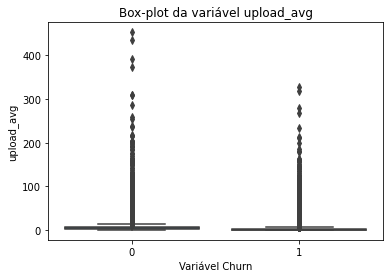

In [25]:
# upload_avg em relação ao Churn
sns.boxplot(x="churn", y="upload_avg", data=churn_df);
plt.title('Box-plot da variável upload_avg');
plt.xlabel('Variável Churn');
plt.ylabel('upload_avg');
churn_df.groupby(['churn'])['upload_avg'].mean()

#### O upload_avg não parece influenciar na previsão de churn.

# 3. Pré-processamendo de Dados

In [26]:
churn_df.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,NaN,1,0.0,0.0,0,1
8,94,0,0,8.54,0,NaN,0,0.0,0.0,0,1
9,112,0,0,8.33,0,NaN,0,0.0,0.0,0,1


### Descarte de variáveis não importantes

In [28]:
# dropando as variaveis de interesse
churn1 = churn_df.drop(columns = ['id'])

In [29]:
churn1.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1


### Categorização de variáveis contínuas

In [30]:
def auxiliar(x):
    if x == 0:
        return 'finalizado'
    elif x < 1:
        return 'menos que 1'
    elif x > 1 :
        return 'mais que 1'
    
    else:
        return 'sem contrato'

churn1['reamining_contract'] = churn1['reamining_contract'].apply(auxiliar)
churn1.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,menos que 1,0,8.4,2.3,0,0
1,0,0,8.22,0,sem contrato,0,0.0,0.0,0,1
2,1,0,8.91,16,finalizado,0,13.7,0.9,0,1
3,0,0,6.87,21,sem contrato,1,0.0,0.0,0,1
4,0,0,6.39,0,sem contrato,0,0.0,0.0,0,1


### Identificando dados faltantes

In [31]:
churn1.isnull().mean()

is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.000000
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [32]:
churn1['download_avg'] = churn1['download_avg'].fillna(churn1['download_avg'].median())
churn1['upload_avg'] = churn1['upload_avg'].fillna(churn1['upload_avg'].median())

In [33]:
churn1.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [34]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  object 
 1   is_movie_package_subscriber  72274 non-null  object 
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  int64  
 4   reamining_contract           72274 non-null  object 
 5   service_failure_count        72274 non-null  int64  
 6   download_avg                 72274 non-null  float64
 7   upload_avg                   72274 non-null  float64
 8   download_over_limit          72274 non-null  object 
 9   churn                        72274 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


### Escala das Variáveis Contínuas

In [35]:
# padronização
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn1[['subscription_age', 'bill_avg', 'service_failure_count','download_avg', 'upload_avg']] = scaler.fit_transform(churn1[['subscription_age', 'bill_avg', 'service_failure_count','download_avg', 'upload_avg']])

### Agrupamento de Categorias

In [36]:
churn1['download_over_limit'].value_counts()

0    68373
1      766
6      688
2      560
7      504
3      498
4      456
5      429
Name: download_over_limit, dtype: int64

In [37]:
def auxiliar1(x):
    if x == "0":
        return '0-'
    else:
        return '1+'

churn1['download_over_limit'] = churn1['download_over_limit'].apply(auxiliar1)

### Dummyficação de Variáveis

In [41]:
variaveis_cat = ['is_tv_subscriber', 'is_movie_package_subscriber','reamining_contract','download_over_limit']

churn1 = pd.get_dummies(churn1, columns = variaveis_cat, drop_first = True)

churn1.head()

,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,churn,is_tv_subscriber_1,is_movie_package_subscriber_1,reamining_contract_mais que 1,reamining_contract_menos que 1,reamining_contract_sem contrato,download_over_limit_1+
0,0.933697,0.061576,0.000000,0.001903,0.005074,0,1,0,0,1,0,0
1,0.642746,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,0.696568,0.039409,0.000000,0.003103,0.001985,1,1,0,0,0,0,0
3,0.537441,0.051724,0.052632,0.000000,0.000000,1,0,0,0,0,1,0
4,0.500000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0


# 4. Machine Learning

In [42]:
# separação de variáveis preditoras e variával resposta
X = churn1.drop('churn', axis = 1)
y = churn1['churn']

In [43]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25)
x_treino

,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,is_tv_subscriber_1,is_movie_package_subscriber_1,reamining_contract_mais que 1,reamining_contract_menos que 1,reamining_contract_sem contrato,download_over_limit_1+
22640,0.186427,0.056650,0.000000,0.000679,0.000662,1,0,0,0,1,0
19850,0.393136,0.046798,0.000000,0.002401,0.003971,1,0,0,0,0,0
25556,0.154446,0.054187,0.000000,0.002038,0.000882,1,0,0,0,1,0
23300,0.081123,0.051724,0.105263,0.000000,0.000000,0,0,0,0,0,0
1823,0.170047,0.034483,0.000000,0.000000,0.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
202,0.780811,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0
483,0.512480,0.059113,0.052632,0.007270,0.010368,0,0,0,0,1,0
52558,0.146646,0.034483,0.000000,0.006636,0.011692,1,0,0,1,0,0
22344,0.438378,0.051724,0.000000,0.010985,0.006839,1,1,0,0,1,0


### Regressão Logística

In [45]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=200)

# fit the model with data
logreg.fit(x_treino, y_treino)
y_pred = logreg.predict(x_teste)

In [46]:
# import the metrics class
from sklearn import metrics

# Matriz de confusão
logreg_matrix = metrics.confusion_matrix(y_teste, y_pred)
logreg_matrix

array([[7527,  498],
       [ 986, 9058]], dtype=int64)

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8025
           1       0.95      0.90      0.92     10044

    accuracy                           0.92     18069
   macro avg       0.92      0.92      0.92     18069
weighted avg       0.92      0.92      0.92     18069



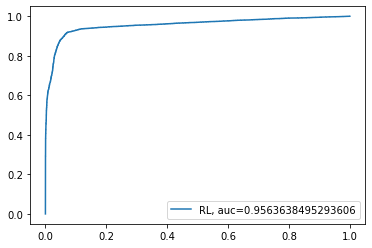

In [48]:
y_pred_proba = logreg.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  y_pred_proba)
auc = metrics.roc_auc_score(y_teste, y_pred_proba)
plt.plot(fpr,tpr,label="RL, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KNN

In [49]:
# Utilizando k=5 que é o valor default da função Knn 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [50]:
# A matriz de confusão
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        7514   511   8025
1         802  9242  10044
All      8316  9753  18069


In [51]:
# Metricas
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8025
           1       0.95      0.92      0.93     10044

    accuracy                           0.93     18069
   macro avg       0.93      0.93      0.93     18069
weighted avg       0.93      0.93      0.93     18069



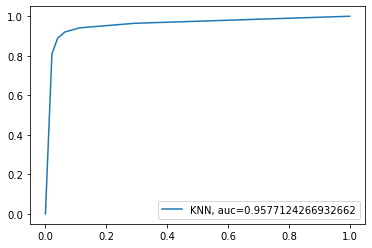

In [52]:
knn_proba = knn.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  knn_proba)
auc = metrics.roc_auc_score(y_teste, knn_proba)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
# O modelo com 100 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 100) 
rf.fit (x_treino, y_treino)


RandomForestClassifier()

In [54]:
# A matriz de confusão
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        7570   455   8025
1         652  9392  10044
All      8222  9847  18069


In [55]:
# Metricas
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8025
           1       0.95      0.94      0.94     10044

    accuracy                           0.94     18069
   macro avg       0.94      0.94      0.94     18069
weighted avg       0.94      0.94      0.94     18069



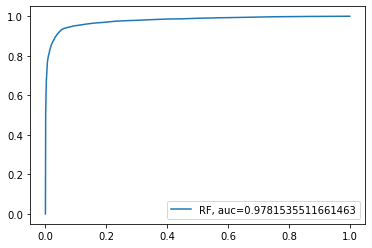

In [56]:
rf_proba = rf.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  rf_proba)
auc = metrics.roc_auc_score(y_teste, rf_proba)
plt.plot(fpr,tpr,label="RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [57]:
#Analisando a importância de cada variável
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
reamining_contract_mais que 1,0.258833
reamining_contract_menos que 1,0.232815
download_avg,0.131288
upload_avg,0.096993
reamining_contract_sem contrato,0.085628
subscription_age,0.083807
bill_avg,0.060584
is_movie_package_subscriber_1,0.021843
is_tv_subscriber_1,0.019627
service_failure_count,0.007011


### Árvores de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier (max_depth = 3, min_samples_split = 150) 
tree.fit (x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, min_samples_split=150)

In [59]:
# A matriz de confusão
y_tree = tree.predict(x_teste)
print (pd.crosstab(y_teste,y_tree, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        7505   520   8025
1         689  9355  10044
All      8194  9875  18069


In [60]:
# Metricas
print(classification_report(y_teste, y_tree))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8025
           1       0.95      0.93      0.94     10044

    accuracy                           0.93     18069
   macro avg       0.93      0.93      0.93     18069
weighted avg       0.93      0.93      0.93     18069



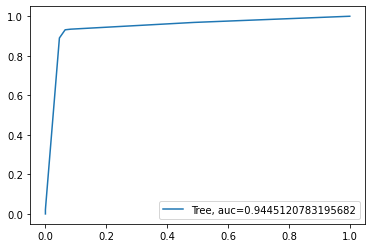

In [61]:
tree_proba = tree.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  tree_proba)
auc = metrics.roc_auc_score(y_teste, tree_proba)
plt.plot(fpr,tpr,label="Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Combinação de Modelos SOFT

In [62]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('tree',tree),('knn', knn)], voting='soft')
voto = voto.fit(x_treino,y_treino)

In [63]:
y_predit = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predit, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1    All
Real                      
0        7527   498   8025
1         660  9384  10044
All      8187  9882  18069


In [64]:
print(classification_report(y_teste, y_predit))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8025
           1       0.95      0.93      0.94     10044

    accuracy                           0.94     18069
   macro avg       0.93      0.94      0.94     18069
weighted avg       0.94      0.94      0.94     18069



### Probabilidade de Churn

In [65]:
# A probabilidade do cliente dar Churn para criar estratégias sobre isso.
churn_df['proba'] = voto.predict_proba(churn1[x_treino.columns])[:,1]
churn_df[['id','proba']]

,id,proba
0,15,0.056463
1,18,0.917776
2,23,0.917776
3,27,0.901276
4,34,0.917776
...,...,...
72269,1689648,0.782246
72270,1689676,0.318201
72271,1689679,0.314868
72272,1689733,0.997585


In [66]:
churn_df['proba'] = rf.predict_proba(churn1[x_treino.columns])[:,1]
churn_df[['id','proba']]

,id,proba
0,15,0.040
1,18,1.000
2,23,1.000
3,27,0.975
4,34,1.000
...,...,...
72269,1689648,0.960
72270,1689676,0.730
72271,1689679,0.630
72272,1689733,1.000


In [73]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
modelo =  RandomForestClassifier()
parametros = {   
                 'n_estimators': [50, 100, 150],
                 'max_features': [2,3,4,5],
                 'bootstrap': [True, False] ,      
                 'max_depth' : [2, 4, 6, 8, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]
                 }
random_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                   scoring = 'accuracy', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': [2, 3, 4, 5],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy', verbose=1)

In [77]:
random_search.cv_results_['mean_test_score']

array([0.93978928, 0.93464681, 0.92510455, 0.93726646, 0.93431473,
       0.93776458, 0.93694363, 0.93972932, 0.93991381, 0.93514491])

In [78]:
random_search.best_score_

0.9399138096043583

In [79]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 5,
 'max_depth': 8,
 'bootstrap': False}